# Victims of Mass Shootings Visualization

In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
import gmaps
from datetime import datetime
import gmaps.datasets
import gmaps.geojson_geometries

from config import (census_key, gkey)

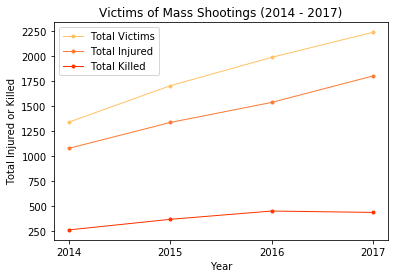

<Figure size 432x288 with 0 Axes>

In [2]:
#load in df from exploration data
totals_df = pd.read_csv("totals_df.csv")
totals_df = pd.DataFrame(data = totals_df)
totals_df['Year'] = totals_df['Year'].astype(str) #change year to string for a neat x axis on graph

#create graph over time of those injured or killed
total, = plt.plot(totals_df['Year'], totals_df['Total Injured or Killed'], color = str('#ffc266'),linewidth=1, label ="Total Victims", marker = '.')
injured, = plt.plot(totals_df['Year'], totals_df['Total Injured'], color=str('#ff7a33'), linewidth=1, label="Total Injured", marker = ".")
killed, = plt.plot(totals_df['Year'], totals_df['Total Killed'], color=str('#ff3300'), linewidth=1, label="Total Killed", marker = ".")
plt.legend(handles=[total, injured, killed])
plt.xlabel('Year')
plt.title("Victims of Mass Shootings (2014 - 2017)")
plt.ylabel('Total Injured or Killed')
plt.show()

plt.savefig("Plots/Overall_Victims.png")

# Total Number of Mass Shootings Visualization

In [3]:
#load in df from exploration data
total_mass_shootings = pd.read_csv("total_mass_shootings.csv")
total_mass_shootings = pd.DataFrame(data = total_mass_shootings)
total_mass_shootings.dtypes
total_mass_shootings['years'] = total_mass_shootings['years'].astype(str) #convert years to object for neat x axis on plot
total_mass_shootings

,years,total_shootings
0,2014,268
1,2015,335
2,2016,382
3,2017,346


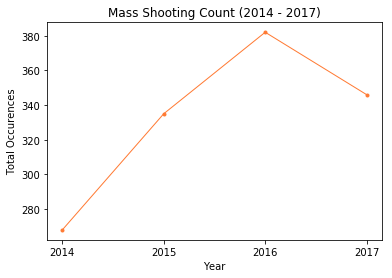

<Figure size 432x288 with 0 Axes>

In [4]:
#mass shooting count
colors = str('#ff7a33')
total, = plt.plot(total_mass_shootings['years'], total_mass_shootings['total_shootings'], color = colors,linewidth=1, marker = '.')

plt.xlabel('Year')
plt.title("Mass Shooting Count (2014 - 2017)")
plt.ylabel('Total Occurences')
plt.show()
plt.savefig("Plots/Overall_Count.png")

In [5]:
state_count_all = pd.read_csv("state_count_all.csv")
state_count_all = state_count_all.sort_values(by=['total_count'], ascending = False) 

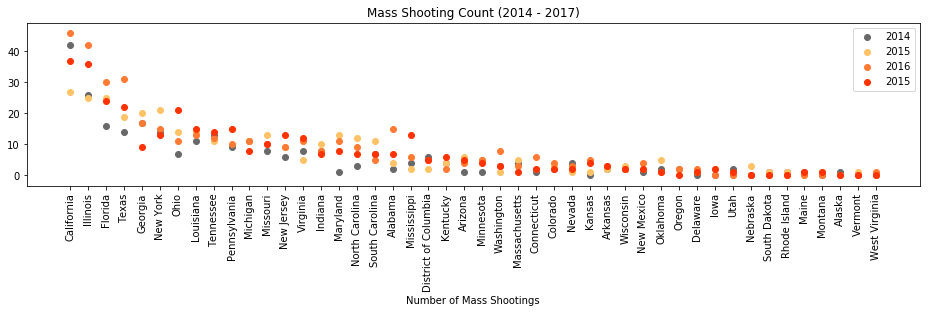

In [6]:
#state spread
plt.figure(figsize=(16,3))
count_2014 = plt.scatter(state_count_all['States'], state_count_all['Count_2014'], color= 'dimgrey', linewidth=1, label="2014")
count_2015 = plt.scatter(state_count_all['States'], state_count_all['Count_2015'], color=str('#ffc266'), linewidth=1, label="2015")
count_2016 = plt.scatter(state_count_all['States'], state_count_all['Count_2016'], color=str('#ff7a33'), linewidth=1, label="2016")
count_2017 = plt.scatter(state_count_all['States'], state_count_all['Count_2017'], color=str('#ff3300'), linewidth=1, label="2015")
plt.xticks(rotation=90)
# Set our legend to where the chart thinks is best
plt.legend(handles=[count_2014, count_2015, count_2016, count_2017])
plt.xlabel('Number of Mass Shootings')
plt.title("Mass Shooting Count (2014 - 2017)")

plt.show()


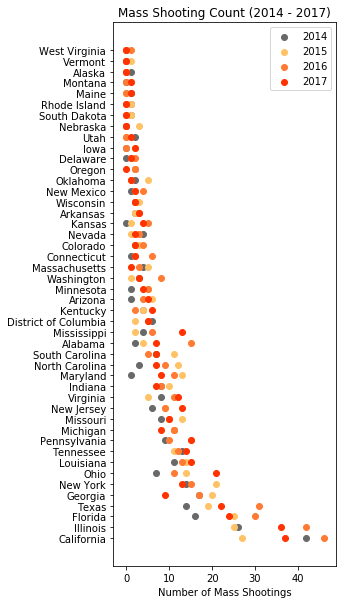

In [7]:
plt.figure(figsize=(4,10))
count_2014 = plt.scatter(state_count_all['Count_2014'],state_count_all['States'],color= 'dimgrey', linewidth=1, label="2014")
count_2015 = plt.scatter(state_count_all['Count_2015'],state_count_all['States'],color=str('#ffc266'), linewidth=1, label="2015")
count_2016 = plt.scatter(state_count_all['Count_2016'],state_count_all['States'],color=str('#ff7a33'), linewidth=1, label="2016")
count_2017 = plt.scatter(state_count_all['Count_2017'],state_count_all['States'],color=str('#ff3300'), linewidth=1, label="2017")
# Set our legend to where the chart thinks is best
plt.legend(handles=[count_2014, count_2015, count_2016, count_2017])
plt.xlabel('Number of Mass Shootings')
plt.title("Mass Shooting Count (2014 - 2017)")

plt.show()

In [8]:
#make same visualization for per capita - load in per capita by state
merged_all = pd.read_csv("merged_all.csv")
merged_all = merged_all.sort_values(by=['Total Per Capita'], ascending = False) 

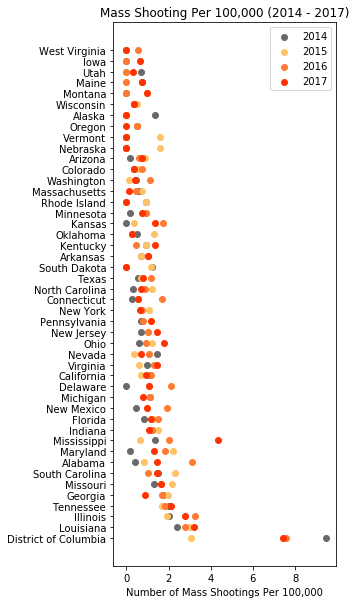

In [9]:
plt.figure(figsize=(4,10))
count_2014 = plt.scatter(merged_all['Per Capita Mass Shooting 2014'],merged_all['States'],color= 'dimgrey', linewidth=1, label="2014")
count_2015 = plt.scatter(merged_all['Per Capita Mass Shooting 2015'],merged_all['States'],color=str('#ffc266'), linewidth=1, label="2015")
count_2016 = plt.scatter(merged_all['Per Capita Mass Shooting 2016'],merged_all['States'],color=str('#ff7a33'), linewidth=1, label="2016")
count_2017 = plt.scatter(merged_all['Per Capita Mass Shooting 2017'],merged_all['States'],color=str('#ff3300'), linewidth=1, label="2017")
# Set our legend to where the chart thinks is best
plt.legend(handles=[count_2014, count_2015, count_2016, count_2017])
plt.xlabel('Number of Mass Shootings Per 100,000')
plt.title("Mass Shooting Per 100,000 (2014 - 2017)")

plt.show()

# Heatmaps with gmaps

In [10]:
#load in df from exploration data
merged_2014 = pd.read_csv("merged_2014.csv")
merged_2015 = pd.read_csv("merged_2015.csv")
merged_2016 = pd.read_csv("merged_2016.csv")
merged_2017 = pd.read_csv("merged_2017.csv")

In [11]:
# Configure gmaps with API key
gmaps.configure(api_key=gkey)

In [12]:
#2014 
#define location and heatpoint
locations = merged_2014[['Latitude', 'Longitude']]
rating = merged_2014['Mass Shooting Count']

# Plot Heatmap
fig = gmaps.figure(map_type = 'HYBRID')
heat_layer = gmaps.heatmap_layer(locations, weights = rating, dissipating = False, max_intensity = 15, point_radius = 2)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [13]:
#2014
#Configure and define base map
gmaps.configure(api_key=gkey)
fig = gmaps.figure(center=(36.5, -98.5795), map_type = 'SATELLITE', zoom_level=4)

# Save geojson country and state outlines for reference
countries_geojson = gmaps.geojson_geometries.load_geometry('countries')
states_geojson = gmaps.geojson_geometries.load_geometry('us-states')

# Create heatmap using total victims as weight
heatmap_layer = gmaps.heatmap_layer(
   merged_2014[['Latitude', 'Longitude']], weights=merged_2014['Mass Shooting Count'], dissipating = False,
   opacity = 1, max_intensity=10, point_radius=2
)

# Configure state and country outlines
gini_layer1 = gmaps.geojson_layer(countries_geojson, fill_color=(217,217,217),fill_opacity=0,stroke_color=(153, 153, 153))
fig.add_layer(gini_layer1)
gini_layer = gmaps.geojson_layer(states_geojson, fill_color=(153, 153, 153),fill_opacity=.01, stroke_color=(153, 153, 153))
fig.add_layer(gini_layer)

# Define heatmap gradient
heatmap_layer.gradient = [
   '#ffffff','#ff3300','#ff7a33','#ffc266' ]

# Add heatmap layer and view map
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [14]:
#2015 
#define location and heatpoint
locations = merged_2015[['Latitude', 'Longitude']]
rating = merged_2015['Mass Shooting Count']
# Plot Heatmap
fig = gmaps.figure(map_type = 'HYBRID')
heat_layer = gmaps.heatmap_layer(locations, weights = rating, dissipating = False, max_intensity = 15, point_radius = 2)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [15]:
#2015
#Configure and define base map
gmaps.configure(api_key=gkey)
fig = gmaps.figure(center=(36.5, -98.5795), map_type = 'SATELLITE', zoom_level=4)

# Save geojson country and state outlines for reference
countries_geojson = gmaps.geojson_geometries.load_geometry('countries')
states_geojson = gmaps.geojson_geometries.load_geometry('us-states')

# Create heatmap using total victims as weight
heatmap_layer = gmaps.heatmap_layer(
   merged_2015[['Latitude', 'Longitude']], weights=merged_2015['Mass Shooting Count'], dissipating = False,
   opacity = 1, max_intensity=10, point_radius=2
)

# Configure state and country outlines
gini_layer1 = gmaps.geojson_layer(countries_geojson, fill_color=(217,217,217),fill_opacity=0,stroke_color=(153, 153, 153))
fig.add_layer(gini_layer1)
gini_layer = gmaps.geojson_layer(states_geojson, fill_color=(153, 153, 153),fill_opacity=.01, stroke_color=(153, 153, 153))
fig.add_layer(gini_layer)

# Define heatmap gradient
heatmap_layer.gradient = ['#ffffff','#ff3300','#ff7a33','#ffc266' ]

# Add heatmap layer and view map
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [16]:
#2016 
#define location and heatpoint
locations = merged_2016[['Latitude', 'Longitude']]
rating = merged_2016['Mass Shooting Count']
# Plot Heatmap
fig = gmaps.figure(map_type = 'HYBRID')
heat_layer = gmaps.heatmap_layer(locations, weights = rating, dissipating = False, max_intensity = 15, point_radius = 2)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [17]:
#2016
#Configure and define base map
gmaps.configure(api_key=gkey)
fig = gmaps.figure(center=(36.5, -98.5795), map_type = 'SATELLITE', zoom_level=4)

# Save geojson country and state outlines for reference
countries_geojson = gmaps.geojson_geometries.load_geometry('countries')
states_geojson = gmaps.geojson_geometries.load_geometry('us-states')

# Create heatmap using total victims as weight
heatmap_layer = gmaps.heatmap_layer(
   merged_2016[['Latitude', 'Longitude']], weights=merged_2016['Mass Shooting Count'], dissipating = False,
   opacity = 1, max_intensity=10, point_radius=2
)

# Configure state and country outlines
gini_layer1 = gmaps.geojson_layer(countries_geojson, fill_color=(217,217,217),fill_opacity=0,stroke_color=(153, 153, 153))
fig.add_layer(gini_layer1)
gini_layer = gmaps.geojson_layer(states_geojson, fill_color=(153, 153, 153),fill_opacity=.01, stroke_color=(153, 153, 153))
fig.add_layer(gini_layer)

# Define heatmap gradient
heatmap_layer.gradient = ['#ffffff','#ff3300','#ff7a33','#ffc266' ]

# Add heatmap layer and view map
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [18]:
#2017 
#define location and heatpoint
locations = merged_2017[['Latitude', 'Longitude']]
rating = merged_2017['Mass Shooting Count']
# Plot Heatmap
fig = gmaps.figure(map_type = 'HYBRID')
heat_layer = gmaps.heatmap_layer(locations, weights = rating, dissipating = False, max_intensity = 15, point_radius = 2)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [19]:
#2017
#Configure and define base map
gmaps.configure(api_key=gkey)
fig = gmaps.figure(center=(36.5, -98.5795), map_type = 'SATELLITE', zoom_level=4)

# Save geojson country and state outlines for reference
countries_geojson = gmaps.geojson_geometries.load_geometry('countries')
states_geojson = gmaps.geojson_geometries.load_geometry('us-states')

# Create heatmap using total victims as weight
heatmap_layer = gmaps.heatmap_layer(
   merged_2017[['Latitude', 'Longitude']], weights=merged_2017['Mass Shooting Count'], dissipating = False,
   opacity = 1, max_intensity=10, point_radius=2
)

# Configure state and country outlines
gini_layer1 = gmaps.geojson_layer(countries_geojson, fill_color=(217,217,217),fill_opacity=0,stroke_color=(153, 153, 153))
fig.add_layer(gini_layer1)
gini_layer = gmaps.geojson_layer(states_geojson, fill_color=(153, 153, 153),fill_opacity=.01, stroke_color=(153, 153, 153))
fig.add_layer(gini_layer)

# Define heatmap gradient
heatmap_layer.gradient = ['#ffffff','#ff3300','#ff7a33','#ffc266' ]
# Add heatmap layer and view map
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

# Heatmaps Per Capita with gmaps

In [20]:
#2014 
#magnify mass shooting per capita so it shows up on the map
#merged_2014['Per Capita Mass exp'] = merged_2014['Per Capita Mass Shooting'] *1500000

#define location and heatpoint
locations = merged_2014[['Latitude', 'Longitude']]
rating = merged_2014['Per Capita Mass Shooting 2014']

# Plot Heatmap
fig = gmaps.figure(map_type = 'HYBRID')
heat_layer = gmaps.heatmap_layer(locations, weights = rating, dissipating = False, max_intensity = 15, point_radius = 2)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [21]:
#2014
#Configure and define base map
gmaps.configure(api_key=gkey)
fig = gmaps.figure(center=(36.5, -98.5795), map_type = 'SATELLITE', zoom_level=4)

# Save geojson country and state outlines for reference
countries_geojson = gmaps.geojson_geometries.load_geometry('countries')
states_geojson = gmaps.geojson_geometries.load_geometry('us-states')

# Create heatmap using total victims as weight
heatmap_layer = gmaps.heatmap_layer(
   merged_2014[['Latitude', 'Longitude']], weights=merged_2014['Per Capita Mass Shooting 2014'] * 10, dissipating = False,
   opacity = 1, max_intensity=10, point_radius=1
)

# Configure state and country outlines
gini_layer1 = gmaps.geojson_layer(countries_geojson, fill_color=(217,217,217),fill_opacity=0,stroke_color=(153, 153, 153))
fig.add_layer(gini_layer1)
gini_layer = gmaps.geojson_layer(states_geojson, fill_color=(153, 153, 153),fill_opacity=.01, stroke_color=(153, 153, 153))
fig.add_layer(gini_layer)

# Define heatmap gradient
heatmap_layer.gradient =['#ffffff','#ff3300','#ff7a33','#ffc266' ]

# Add heatmap layer and view map
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [22]:
#2015 
#magnify mass shooting per capita so it shows up on the map
merged_2015['Per Capita Mass exp'] = merged_2015['Per Capita Mass Shooting 2015'] *10

#define location and heatpoint
locations = merged_2015[['Latitude', 'Longitude']]
rating = merged_2015['Per Capita Mass exp']

# Plot Heatmap
fig = gmaps.figure(map_type = 'HYBRID')
heat_layer = gmaps.heatmap_layer(locations, weights = rating, dissipating = False, max_intensity = 15, point_radius = 1)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [23]:
#2015
#Configure and define base map
gmaps.configure(api_key=gkey)
fig = gmaps.figure(center=(36.5, -98.5795), map_type = 'SATELLITE', zoom_level=4)

# Save geojson country and state outlines for reference
countries_geojson = gmaps.geojson_geometries.load_geometry('countries')
states_geojson = gmaps.geojson_geometries.load_geometry('us-states')

# Create heatmap using total victims as weight
heatmap_layer = gmaps.heatmap_layer(
   merged_2015[['Latitude', 'Longitude']], weights=merged_2015['Per Capita Mass Shooting 2015'] * 10, dissipating = False,
   opacity = 1, max_intensity=10, point_radius=1
)

# Configure state and country outlines
gini_layer1 = gmaps.geojson_layer(countries_geojson, fill_color=(217,217,217),fill_opacity=0,stroke_color=(153, 153, 153))
fig.add_layer(gini_layer1)
gini_layer = gmaps.geojson_layer(states_geojson, fill_color=(153, 153, 153),fill_opacity=.01, stroke_color=(153, 153, 153))
fig.add_layer(gini_layer)

# Define heatmap gradient
heatmap_layer.gradient = ['#ffffff','#ff3300','#ff7a33','#ffc266' ]

# Add heatmap layer and view map
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [24]:
#2016 
#magnify mass shooting per capita so it shows up on the map
merged_2016['Per Capita Mass exp'] = merged_2016['Per Capita Mass Shooting 2016'] *10

#define location and heatpoint
locations = merged_2016[['Latitude', 'Longitude']]
rating = merged_2016['Per Capita Mass exp']

# Plot Heatmap
fig = gmaps.figure(map_type = 'HYBRID')
heat_layer = gmaps.heatmap_layer(locations, weights = rating, dissipating = False, max_intensity = 15, point_radius = 1)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [25]:
#2016
#Configure and define base map
gmaps.configure(api_key=gkey)
fig = gmaps.figure(center=(36.5, -98.5795), map_type = 'SATELLITE', zoom_level=4)

# Save geojson country and state outlines for reference
countries_geojson = gmaps.geojson_geometries.load_geometry('countries')
states_geojson = gmaps.geojson_geometries.load_geometry('us-states')

# Create heatmap using total victims as weight
heatmap_layer = gmaps.heatmap_layer(
   merged_2016[['Latitude', 'Longitude']], weights=merged_2016['Per Capita Mass Shooting 2016'] * 10, dissipating = False,
   opacity = 1, max_intensity=10, point_radius=1
)

# Configure state and country outlines
gini_layer1 = gmaps.geojson_layer(countries_geojson, fill_color=(217,217,217),fill_opacity=0,stroke_color=(153, 153, 153))
fig.add_layer(gini_layer1)
gini_layer = gmaps.geojson_layer(states_geojson, fill_color=(153, 153, 153),fill_opacity=.01, stroke_color=(153, 153, 153))
fig.add_layer(gini_layer)

# Define heatmap gradient
heatmap_layer.gradient = ['#ffffff','#ff3300','#ff7a33','#ffc266' ]

# Add heatmap layer and view map
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [26]:
#2017
#magnify mass shooting per capita so it shows up on the map
merged_2017['Per Capita Mass exp'] = merged_2017['Per Capita Mass Shooting 2017'] * 10

#define location and heatpoint
locations = merged_2017[['Latitude', 'Longitude']]
rating = merged_2017['Per Capita Mass exp']

# Plot Heatmap
fig = gmaps.figure(map_type = 'HYBRID')
heat_layer = gmaps.heatmap_layer(locations, weights = rating, dissipating = False, max_intensity = 15, point_radius = 1)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [27]:
#2017
#Configure and define base map
gmaps.configure(api_key=gkey)
fig = gmaps.figure(center=(36.5, -98.5795), map_type = 'SATELLITE', zoom_level=4)

# Save geojson country and state outlines for reference
countries_geojson = gmaps.geojson_geometries.load_geometry('countries')
states_geojson = gmaps.geojson_geometries.load_geometry('us-states')

# Create heatmap using total victims as weight
heatmap_layer = gmaps.heatmap_layer(
   merged_2017[['Latitude', 'Longitude']], weights=merged_2017['Per Capita Mass Shooting 2017'] * 10, dissipating = False,
   opacity = 1, max_intensity=10, point_radius=1
)

# Configure state and country outlines
gini_layer1 = gmaps.geojson_layer(countries_geojson, fill_color=(217,217,217),fill_opacity=0,stroke_color=(153, 153, 153))
fig.add_layer(gini_layer1)
gini_layer = gmaps.geojson_layer(states_geojson, fill_color=(153, 153, 153),fill_opacity=.01, stroke_color=(153, 153, 153))
fig.add_layer(gini_layer)

# Define heatmap gradient
heatmap_layer.gradient =  ['#ffffff','#ff3300','#ff7a33','#ffc266' ]

# Add heatmap layer and view map
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

# Scatter Plots with Census Data

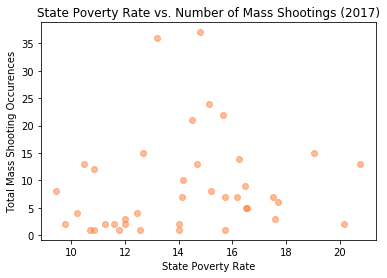

<Figure size 432x288 with 0 Axes>

In [28]:
#Poverty Rates
plt.scatter(merged_2017['Poverty Rates'], merged_2017['Mass Shooting Count'], alpha=0.5, color = str('#ff7a33'))
plt.xlabel('State Poverty Rate')
plt.title("State Poverty Rate vs. Number of Mass Shootings (2017)")
plt.ylabel('Total Mass Shooting Occurences')
plt.show()

plt.savefig("Plots/Poverty_Rate.png")

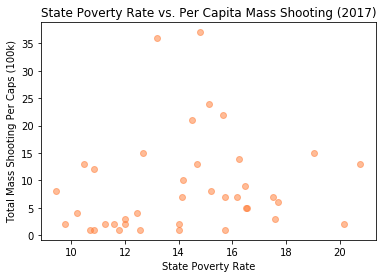

<Figure size 432x288 with 0 Axes>

In [29]:
#Poverty Rates per capita
plt.scatter(merged_2017['Poverty Rates'], merged_2017['Mass Shooting Count'], alpha=0.5, color = str('#ff7a33'))
plt.xlabel('State Poverty Rate')
plt.title("State Poverty Rate vs. Per Capita Mass Shooting (2017)")
plt.ylabel('Total Mass Shooting Per Caps (100k)')
plt.show()

plt.savefig("Plots/Poverty_Rate_percaps.png")

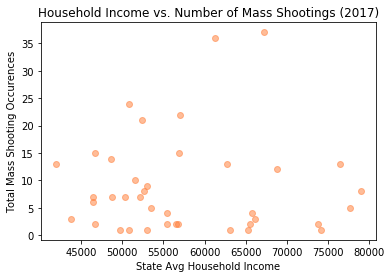

<Figure size 432x288 with 0 Axes>

In [30]:
#Household Income
plt.scatter(merged_2017['Household Income'], merged_2017['Mass Shooting Count'], alpha=0.5, color = str('#ff7a33'))
plt.xlabel('State Avg Household Income')
plt.title("Household Income vs. Number of Mass Shootings (2017)")
plt.ylabel('Total Mass Shooting Occurences')
plt.show()

plt.savefig('Plots/Household_Income.png')

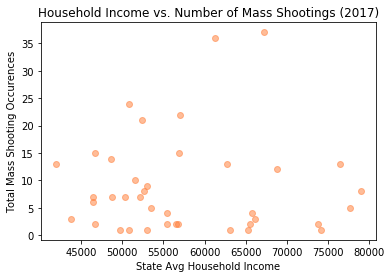

['Per Capita Mass Shooting']

<Figure size 432x288 with 0 Axes>

In [31]:
#Household Income
plt.scatter(merged_2017['Household Income'], merged_2017['Mass Shooting Count'], alpha=0.5, color = str('#ff7a33'))
plt.xlabel('State Avg Household Income')
plt.title("Household Income vs. Number of Mass Shootings (2017)")
plt.ylabel('Total Mass Shooting Occurences')
plt.show()

plt.savefig('Plots/Household_Income.png')

['Per Capita Mass Shooting']

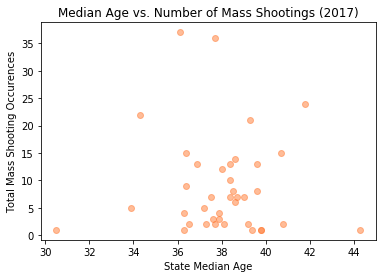

<Figure size 432x288 with 0 Axes>

In [32]:
#Median Age
plt.scatter(merged_2017['Median Age'], merged_2017['Mass Shooting Count'], alpha=0.5, color = str('#ff7a33'))
plt.xlabel('State Median Age')
plt.title("Median Age vs. Number of Mass Shootings (2017)")
plt.ylabel('Total Mass Shooting Occurences')
plt.show()

plt.savefig('Plots/Median_Age.png')

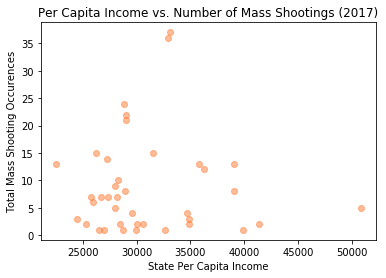

<Figure size 432x288 with 0 Axes>

In [33]:
#Per Capita Income
plt.scatter(merged_2017['Per Capita Income'], merged_2017['Mass Shooting Count'], alpha=0.5, color = str('#ff7a33'))
plt.xlabel('State Per Capita Income')
plt.title("Per Capita Income vs. Number of Mass Shootings (2017)")
plt.ylabel('Total Mass Shooting Occurences')
plt.show()

plt.savefig('Plots/Income.png')

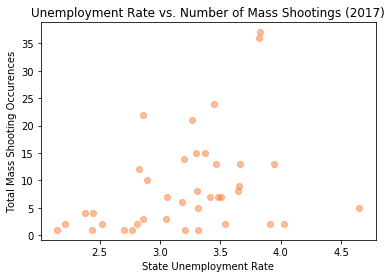

<Figure size 432x288 with 0 Axes>

In [34]:
#Unemployment Rate
plt.scatter(merged_2017['Unemployment Rates'], merged_2017['Mass Shooting Count'], alpha=0.5, color = str('#ff7a33'))
plt.xlabel('State Unemployment Rate')
plt.title("Unemployment Rate vs. Number of Mass Shootings (2017)")
plt.ylabel('Total Mass Shooting Occurences')
plt.show()

plt.savefig('Plots/Unemployment_Rate.png')

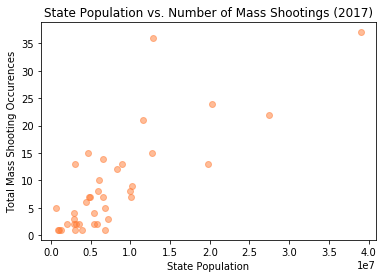

<Figure size 432x288 with 0 Axes>

In [35]:

plt.scatter(merged_2017['Population'], merged_2017['Mass Shooting Count'], alpha=0.5, color = str('#ff7a33'))
plt.xlabel('State Population')
plt.title("State Population vs. Number of Mass Shootings (2017)")
plt.ylabel('Total Mass Shooting Occurences')
plt.show()

plt.savefig('Plots/Population.png')

# Hate Group Data

In [36]:
#2017 hate group count
hate_group_merged = pd.read_csv("hate_group_merged.csv")


In [37]:
#2017 Hate Group Count
#define location and heatpoint
locations = hate_group_merged[['Latitude', 'Longitude']]
rating = hate_group_merged['Hate Group Count']

# Plot Heatmap
fig = gmaps.figure(map_type = 'HYBRID')
heat_layer = gmaps.heatmap_layer(locations, weights = rating, dissipating = False, max_intensity = 15, point_radius = 1)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [38]:
#2017 Hate Group Count
#Configure and define base map
gmaps.configure(api_key=gkey)
fig = gmaps.figure(center=(36.5, -98.5795), map_type = 'SATELLITE', zoom_level=4)

# Save geojson country and state outlines for reference
countries_geojson = gmaps.geojson_geometries.load_geometry('countries')
states_geojson = gmaps.geojson_geometries.load_geometry('us-states')

# Create heatmap using total victims as weight
heatmap_layer = gmaps.heatmap_layer(
   hate_group_merged[['Latitude', 'Longitude']], weights=hate_group_merged['Hate Group Count'] , dissipating = False,
   opacity = 1, max_intensity=10, point_radius=1
)

# Configure state and country outlines
gini_layer1 = gmaps.geojson_layer(countries_geojson, fill_color=(217,217,217),fill_opacity=0,stroke_color=(153, 153, 153))
fig.add_layer(gini_layer1)
gini_layer = gmaps.geojson_layer(states_geojson, fill_color=(153, 153, 153),fill_opacity=.01, stroke_color=(153, 153, 153))
fig.add_layer(gini_layer)

# Define heatmap gradient
heatmap_layer.gradient = ['#ffffff','#ff3300','#ff7a33','#ffc266' ]

# Add heatmap layer and view map
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [51]:
#2017 Hate Group Count per Capita
#Configure and define base map
gmaps.configure(api_key=gkey)
fig = gmaps.figure(center=(36.5, -98.5795), map_type = 'SATELLITE', zoom_level=4)

# Save geojson country and state outlines for reference
countries_geojson = gmaps.geojson_geometries.load_geometry('countries')
states_geojson = gmaps.geojson_geometries.load_geometry('us-states')

# Create heatmap using total victims as weight
heatmap_layer = gmaps.heatmap_layer(
   hate_group_merged[['Latitude', 'Longitude']], weights=hate_group_merged['Per Capita Hate Group'] * 10 , dissipating = False,
   opacity = 1, max_intensity=10, point_radius=1
)

# Configure state and country outlines
gini_layer1 = gmaps.geojson_layer(countries_geojson, fill_color=(217,217,217),fill_opacity=0,stroke_color=(153, 153, 153))
fig.add_layer(gini_layer1)
gini_layer = gmaps.geojson_layer(states_geojson, fill_color=(153, 153, 153),fill_opacity=.01, stroke_color=(153, 153, 153))
fig.add_layer(gini_layer)

# Define heatmap gradient
heatmap_layer.gradient = ['#ffffff','#ff3300','#ff7a33','#ffc266' ]

# Add heatmap layer and view map
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [64]:
#load files for analysis
hate_group_merged = pd.read_csv("hate_group_merged.csv")
hate_group_merged2 = pd.read_csv("hate_group_merged2.csv")
hate_group_merged_2016 = pd.read_csv("hate_group_merged_2016.csv")
hate_group_merged_2015 = pd.read_csv("hate_group_merged_2015.csv")
hate_group_merged_2014 = pd.read_csv("hate_group_merged_2014.csv")

#get the total count of hategroups per year
total_2017 = hate_group_merged['Hate Group Count'].sum()
total_2016 = hate_group_merged_2016['Hate Group Count'].sum()
total_2015 = hate_group_merged_2015['Hate Group Count'].sum()
total_2014 = hate_group_merged_2014['Hate Group Count'].sum()

In [41]:
#combine all totals for visualizations
totals = {'Year': ['2014', '2015','2016','2017'], 'Total Hate Groups': [total_2014, total_2015, total_2016, total_2017]}

#Review dataframe
totals_df = pd.DataFrame(data = totals)
totals_df


,Year,Total Hate Groups
0,2014,726
1,2015,861
2,2016,862
3,2017,882


Text(0,0.5,'Number of Groups')

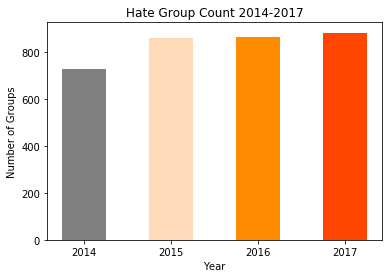

In [42]:
# Create a bar chart based upon the above data
plt.bar(totals_df['Year'], totals_df['Total Hate Groups'], width = 0.5, color=['grey','peachpuff','darkorange','orangered'] , align="center")
plt.title("Hate Group Count 2014-2017")
plt.xlabel("Year")
plt.ylabel("Number of Groups")

In [43]:
hate_group_merged.sort_values(by=['Per Capita Hate Group'], ascending = False) 

,States,Mass Shooting Count,Total_Victims,State,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rates,Unemployment Count,Unemployment Rates,Latitude,Longitude,Per Capita Mass Shooting 2017,Hate Group Count,Per Capita Hate Group
7,District of Columbia,5,24,11,672391.0,33.9,77649.0,50832.0,111025.0,16.511970,31279.0,4.651906,38.9101,-77.0147,7.436150,26,3.866798
23,Montana,1,5,30,1029862.0,39.8,50801.0,28706.0,144198.0,14.001682,25076.0,2.434889,47.0527,-109.6333,0.971004,8,0.776803
33,Tennessee,14,70,47,6597381.0,38.6,48708.0,27277.0,1072360.0,16.254329,210756.0,3.194540,35.8580,-86.3505,2.122054,37,0.560829
21,Mississippi,13,65,28,2986220.0,36.9,42009.0,22500.0,620007.0,20.762268,117786.0,3.944318,32.7364,-89.6678,4.353330,15,0.502307
0,Alabama,7,44,1,4850771.0,38.7,46472.0,25746.0,849699.0,17.516782,165391.0,3.409582,32.7794,-86.8287,1.443070,23,0.474151
11,Indiana,7,33,18,6614418.0,37.5,52182.0,27305.0,933540.0,14.113713,202199.0,3.056943,39.8942,-86.2816,1.058294,30,0.453555
36,Virginia,12,58,51,8365952.0,38.0,68766.0,36268.0,906838.0,10.839627,236648.0,2.828704,37.5215,-78.8537,1.434385,37,0.442269
2,Arkansas,3,37,5,2977944.0,37.9,43813.0,24426.0,524211.0,17.603118,85128.0,2.858617,34.8938,-92.4426,1.007406,12,0.402963
9,Georgia,9,45,13,10201635.0,36.4,52977.0,28015.0,1679030.0,16.458440,372581.0,3.652169,32.6415,-83.4426,0.882212,40,0.392094
4,Colorado,2,12,8,5436519.0,36.5,65458.0,34845.0,612143.0,11.259834,152856.0,2.811652,38.9972,-105.5478,0.367882,21,0.386277


Text(0,0.5,'Number of Groups')

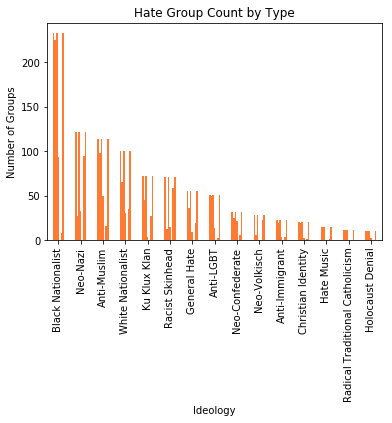

In [49]:
colors = '#ff7a33'
labels = types_df.index
types_df.plot(kind="bar", align="center", color = str(colors), legend = False)
plt.title("Hate Group Count by Type")
plt.xlabel("Ideology")
plt.ylabel("Number of Groups")

In [53]:
hate_group_merged

,States,Mass Shooting Count,Total_Victims,State,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rates,Unemployment Count,Unemployment Rates,Latitude,Longitude,Per Capita Mass Shooting 2017,Hate Group Count,Per Capita Hate Group
0,Alabama,7,44,1,4850771.0,38.7,46472.0,25746.0,849699.0,17.516782,165391.0,3.409582,32.7794,-86.8287,1.443070,23,0.474151
1,Arizona,5,20,4,6809946.0,37.2,53510.0,27964.0,1128046.0,16.564683,225911.0,3.317368,34.2744,-111.6602,0.734220,22,0.323057
2,Arkansas,3,37,5,2977944.0,37.9,43813.0,24426.0,524211.0,17.603118,85128.0,2.858617,34.8938,-92.4426,1.007406,12,0.402963
3,California,37,186,6,38982847.0,36.1,67169.0,33128.0,5773408.0,14.810124,1491146.0,3.825134,37.1841,-119.4696,0.949135,75,0.192392
4,Colorado,2,12,8,5436519.0,36.5,65458.0,34845.0,612143.0,11.259834,152856.0,2.811652,38.9972,-105.5478,0.367882,21,0.386277
5,Connecticut,2,8,9,3594478.0,40.8,73781.0,41365.0,350783.0,9.758941,140712.0,3.914671,41.6219,-72.7273,0.556409,6,0.166923
6,Delaware,1,4,10,943732.0,39.8,63036.0,32625.0,111304.0,11.794026,30245.0,3.204829,38.9896,-75.5050,1.059623,2,0.211925
7,District of Columbia,5,24,11,672391.0,33.9,77649.0,50832.0,111025.0,16.511970,31279.0,4.651906,38.9101,-77.0147,7.436150,26,3.866798
8,Florida,24,122,12,20278447.0,41.8,50883.0,28774.0,3070972.0,15.144020,699117.0,3.447586,28.6305,-82.4497,1.183523,66,0.325469
9,Georgia,9,45,13,10201635.0,36.4,52977.0,28015.0,1679030.0,16.458440,372581.0,3.652169,32.6415,-83.4426,0.882212,40,0.392094


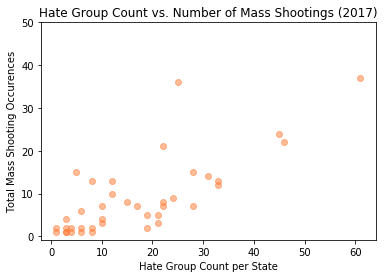

<Figure size 432x288 with 0 Axes>

In [65]:
#2017 correlation
plt.scatter(hate_group_merged2['Hate Group Count'], hate_group_merged2['Mass Shooting Count'], alpha=0.5, color = str('#ff7a33'))
plt.xlabel('Hate Group Count per State')
plt.title("Hate Group Count vs. Number of Mass Shootings (2017)")
plt.ylim(top=50)
plt.ylabel('Total Mass Shooting Occurences')
plt.show()

plt.savefig('Plots/Hate_Groups2017.png')

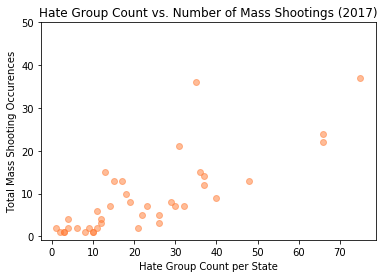

<Figure size 432x288 with 0 Axes>

In [56]:
#2017 correlation
plt.scatter(hate_group_merged['Hate Group Count'], hate_group_merged['Mass Shooting Count'], alpha=0.5, color = str('#ff7a33'))
plt.xlabel('Hate Group Count per State')
plt.title("Hate Group Count vs. Number of Mass Shootings (2017)")
plt.ylim(top=50)
plt.ylabel('Total Mass Shooting Occurences')
plt.show()

plt.savefig('Plots/Hate_Groups2017.png')

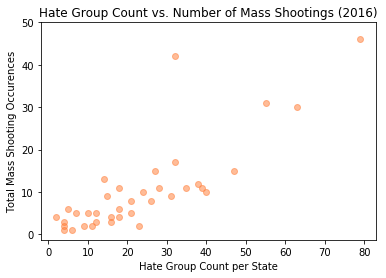

<Figure size 432x288 with 0 Axes>

In [66]:
#2016 correlation
plt.scatter(hate_group_merged_2016['Hate Group Count'], hate_group_merged_2016['Mass Shooting Count'], alpha=0.5, color = str('#ff7a33'))
plt.xlabel('Hate Group Count per State')
plt.title("Hate Group Count vs. Number of Mass Shootings (2016)")
plt.ylim(top=50)
plt.ylabel('Total Mass Shooting Occurences')
plt.show()

plt.savefig('Plots/Hate_Groups2016.png')

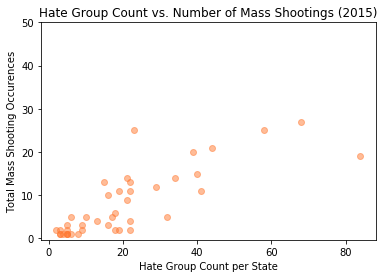

<Figure size 432x288 with 0 Axes>

In [67]:
#2015 correlation
plt.scatter(hate_group_merged_2015['Hate Group Count'], hate_group_merged_2015['Mass Shooting Count'], alpha=0.5, color = str('#ff7a33'))
plt.xlabel('Hate Group Count per State')
plt.title("Hate Group Count vs. Number of Mass Shootings (2015)")
plt.ylim(top=50)
plt.ylabel('Total Mass Shooting Occurences')
plt.show()

plt.savefig('Plots/Hate_Groups2015.png')

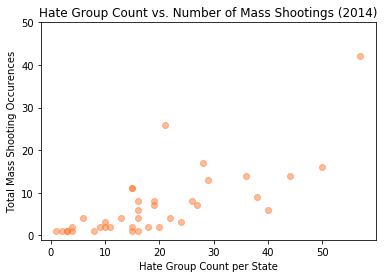

<Figure size 432x288 with 0 Axes>

In [68]:
#2014 correlation
plt.scatter(hate_group_merged_2014['Hate Group Count'], hate_group_merged_2014['Mass Shooting Count'], alpha=0.5, color = str('#ff7a33'))
plt.xlabel('Hate Group Count per State')
plt.title("Hate Group Count vs. Number of Mass Shootings (2014)")
plt.ylim(top=50)
plt.ylabel('Total Mass Shooting Occurences')
plt.show()

plt.savefig('Plots/Hate_Groups2014.png')

# Regression

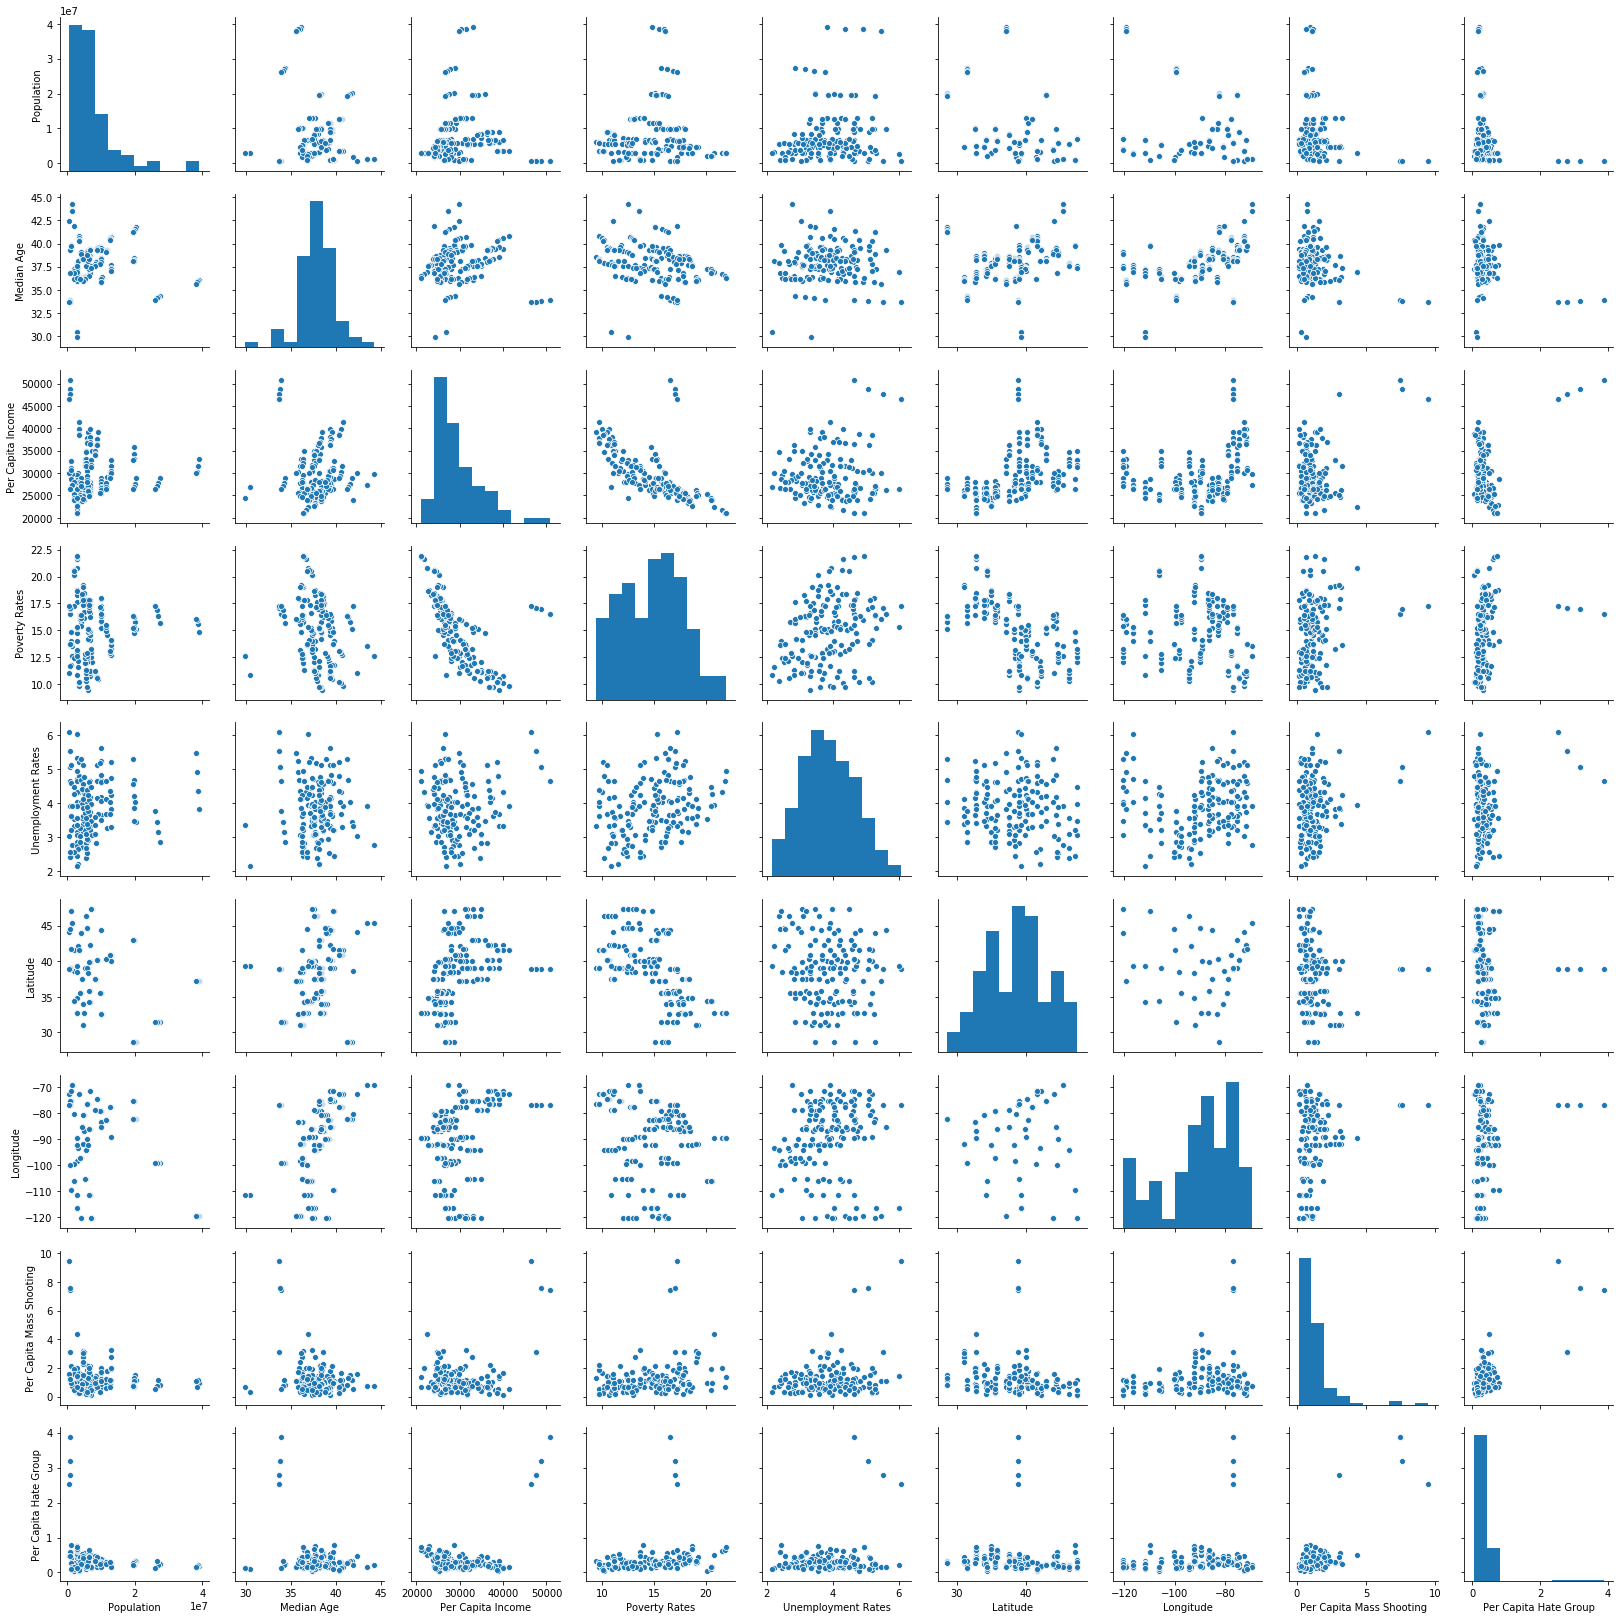

<Figure size 432x288 with 0 Axes>

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

#load files for analysis
hate_group_linear = pd.read_csv("hate_group_linear.csv")

# Basic correlogram
sns.pairplot(hate_group_linear)
plt.show()
plt.savefig('Correlation.png')